# 模板匹配
### 模板匹配和卷积原理很像，模板在原图像上从原点开始滑动。计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AB大小，而模板是ab大小，则输出结果的矩阵是（A-a+1）*(B-b+1)

In [1]:
#导入相关库与包
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义一个图片显示函数
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
lena = cv2.imread("lena.jfif",0)
lena_face = cv2.imread("face.png",0)
print(lena_face.shape)
h,w = lena_face.shape     #注意传回来的参数与我们常
print(lena.shape)

(107, 74)
(200, 200)


In [4]:
cv_show("lena",lena)

In [5]:
cv_show("lena_face",lena_face)

In [6]:
methods = ['cv2.TM_SQDIFF','cv2.TM_CCORR','cv2.TM_CCOEFF','cv2.TM_SQDIFF_NORMED','cv2.TM_CCORR_NORMED','cv2.TM_CCOEFF_NORMED']

In [7]:
res = cv2.matchTemplate(lena,lena_face,cv2.TM_SQDIFF)
res.shape

(94, 127)

In [8]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)     #最小值、最大值，最小值坐标位置，最大值坐标位置
number = [min_val,max_val,min_loc,max_loc]

In [9]:
for i in range(4):
    print(number[i])

30640656.0
92204448.0
(75, 64)
(116, 27)


0


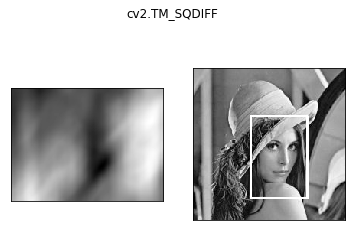

2


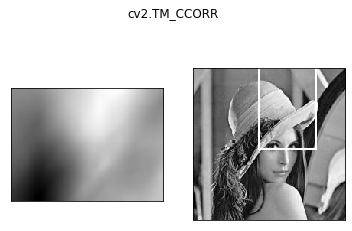

4


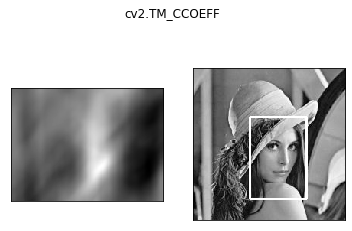

1


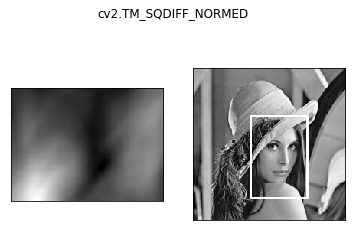

3


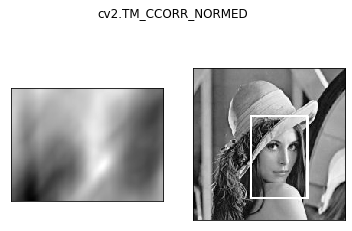

5


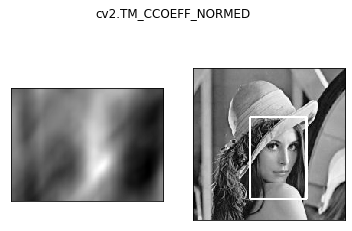

In [10]:
for meth in methods:
    img2 = lena.copy()
    
    #匹配方法的真值
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(lena,lena_face,method)
    min_val ,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMEN 最最小值
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    #画矩形
    cv2.rectangle(img2,top_left,bottom_right,255,2)
    
    plt.subplot(121),plt.imshow(res,cmap = "gray")
    plt.xticks([]),plt.yticks([])                    #屏蔽坐标轴
    plt.subplot(122),plt.imshow(img2,cmap = "gray")
    plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## 匹配多个对象

In [11]:
img_rgb = cv2.imread("money.jfif")
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
img_object = cv2.imread("money_min.png",0)
h,w = img_object.shape

res = cv2.matchTemplate(img_gray,img_object,cv2.TM_CCOEFF_NORMED)
threshold = 0.705          #此处就真真正正成为了调参专家。或大或小都不能匹配的了。
#取匹配程度大于80%的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):      #*表示可选参数
    bottom_right = (pt[0] + w ,pt[1] + h)
    cv2.rectangle(img_rgb,pt,bottom_right,(0,0,255),2)
    
cv2.imshow("img_rgb",img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()